# TSE Deep Learning Project

# M4 competition benchmarks

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import tqdm #loading bar

from datetime import timedelta, date

## Importing train/test data - 100 time series for each frequency

In [3]:
mypath = "./data/"
number_obs = 100


Y_train_sample = pd.read_csv(mypath+"Yearly-train.csv",nrows=number_obs)
Q_train_sample = pd.read_csv(mypath+"Quarterly-train.csv",nrows=number_obs)
M_train_sample = pd.read_csv(mypath+"Monthly-train.csv",nrows=number_obs)
W_train_sample = pd.read_csv(mypath+"Weekly-train.csv",nrows=number_obs)
D_train_sample = pd.read_csv(mypath+"Daily-train.csv",nrows=number_obs)
H_train_sample = pd.read_csv(mypath+"Hourly-train.csv",nrows=number_obs)

Y_test_sample = pd.read_csv(mypath+"Yearly-test.csv",nrows=number_obs)
Q_test_sample = pd.read_csv(mypath+"Quarterly-test.csv",nrows=number_obs)
M_test_sample = pd.read_csv(mypath+"Monthly-test.csv",nrows=number_obs)
W_test_sample = pd.read_csv(mypath+"Weekly-test.csv",nrows=number_obs)
D_test_sample = pd.read_csv(mypath+"Daily-test.csv",nrows=number_obs)
H_test_sample = pd.read_csv(mypath+"Hourly-test.csv",nrows=number_obs)

## Importing submissions of other models (Naive2, ...)

### Naive2 model (reference model)

In [4]:
Naive2 = pd.read_csv("./submissions/submission-Naive2.csv")
Naive2.columns = ["V"+str(k) for k in range(1,50)] #rename columns from "F" to "V" to match initial data
Naive2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
0,Y1,7261.100000,7261.100000,7261.100000,7261.100000,7261.100000,7261.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y2,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y3,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y4,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,9670.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y5,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,H410,56.208032,47.006602,44.530355,34.224446,33.037873,42.002444,98.183162,152.902167,137.079202,...,136.075512,148.247463,181.968142,181.613142,121.847216,91.868127,80.027428,75.499616,89.210361,77.0
99996,H411,24.094526,17.725676,16.965601,16.982407,24.083452,42.843145,95.027523,143.756650,115.608429,...,101.182500,122.227631,114.043938,99.673744,81.260003,56.649318,48.088216,42.809145,37.331929,42.0
99997,H412,25.948474,19.698586,17.333441,18.439507,16.823401,20.724566,45.102596,82.468457,86.393414,...,107.569276,140.111544,189.985763,220.140187,117.983990,77.347983,64.970875,55.978167,42.346634,36.0
99998,H413,39.073565,32.620293,31.425018,27.776191,26.574908,26.844655,28.807644,30.815392,33.427599,...,97.055841,98.593176,99.890639,96.252146,98.086140,87.523308,76.553610,62.002939,55.019519,46.0


In [5]:
#preparing the submission
horizon = [6,8,18,13,14,48]
nb_ts = [23000,24000,48000,359,4227,414]
ind = np.cumsum(nb_ts)

Y_Naive2_sample = Naive2.iloc[:ind[0],:(horizon[0]+1)].iloc[:100,:]
Q_Naive2_sample = Naive2.iloc[ind[0]:ind[1],:(horizon[1]+1)].reset_index(drop=True).iloc[:100,:]
M_Naive2_sample = Naive2.iloc[ind[1]:ind[2],:(horizon[2]+1)].reset_index(drop=True).iloc[:100,:]
W_Naive2_sample = Naive2.iloc[ind[2]:ind[3],:(horizon[3]+1)].reset_index(drop=True).iloc[:100,:]
D_Naive2_sample = Naive2.iloc[ind[3]:ind[4],:(horizon[4]+1)].reset_index(drop=True).iloc[:100,:]
H_Naive2_sample = Naive2.iloc[ind[4]:ind[5],:(horizon[5]+1)].reset_index(drop=True).iloc[:100,:]

## Implementing metrics

In [6]:
def diff(x,m):
    n = x.shape[0]
    out = np.zeros(n-m)
    for k in range(n-m):
        out[k] = x[m+k] - x[k]
    return out

def MASE(train, test, pred,freq):
    """"Compute the MASE for one category frequency of M4 data (yearly, monthly, etc...)
    
    Parameters
    ----------
    train : DataFrame
        ex: Yearly training dataframe
        
    test : Dataframe
        ex: Yearly training dataframe
        
    pred : Dataframe
        ex: Yearly dataframe prediction from one model (Prophet, NBeats, or submissions)
        
    freq : "Y" for yearly data, "M" for monthly data, etc..
        This parameter determines the m in the formula of the metric.
    """
    
    rows = train.shape[0]
    mase = np.zeros(rows)
    if freq in ["Y","W","D"]:
        for k in range(rows):
            ts_train = train.iloc[k,1:].dropna()
            ts_test = test.iloc[k,1:]
            ts_pred = pred.iloc[k,1:]
            d = np.abs(np.diff( ts_train)).mean()
            errors = np.abs(ts_test - ts_pred)
            mase[k] = errors.mean()/d
            
    elif freq == "Q":
        m = 4
        for k in range(rows):
            ts_train = train.iloc[k,1:].dropna()
            ts_test = test.iloc[k,1:]
            ts_pred = pred.iloc[k,1:]
            d = np.abs(diff(ts_train,m)).mean()
            errors = np.abs(ts_test - ts_pred)
            mase[k] = errors.mean()/d
            
    elif freq == "M":
        m = 12
        for k in range(rows):
            ts_train = train.iloc[k,1:].dropna()
            ts_test = test.iloc[k,1:]
            ts_pred = pred.iloc[k,1:]
            d = np.abs(diff(ts_train,m)).mean()
            errors = np.abs(ts_test - ts_pred)
            mase[k] = errors.mean()/d
            
    elif freq == "H":
        m = 24
        for k in range(rows):
            ts_train = train.iloc[k,1:].dropna()
            ts_test = test.iloc[k,1:]
            ts_pred = pred.iloc[k,1:]
            d = np.abs(diff(ts_train,m)).mean()
            errors = np.abs(ts_test - ts_pred)
            mase[k] = errors.mean()/d
            
    else: 
        print("invalid freq parameter")
        
    return mase.mean()



def sMAPE(train,test,pred):
    """"Compute the sMAPE for one category frequency of M4 data (yearly, monthly, etc...)
    
    Parameters
    ----------
    train : DataFrame
        ex: Yearly training dataframe
        
    test : Dataframe
        ex: Yearly training dataframe
        
    pred : Dataframe
        ex: Yearly dataframe prediction from one model (Prophet, NBeats, or submissions)
    """
    rows = train.shape[0]
    s = np.zeros(rows)
    for k in range(rows):
        ts_train = train.iloc[k,1:].dropna()
        ts_test = test.iloc[k,1:]
        ts_pred = pred.iloc[k,1:]

        a = np.abs(ts_test - ts_pred)
        b = (np.abs(ts_test) + np.abs(ts_pred))/2
        s[k] = np.mean(a/b) * 100
    return s.mean()

In [7]:
def get_error(preds):
    """Compute and return the MASE and sMAPE for every frequency of the data as a DataFrame
    
    Parameters
    ----------
    preds : list of all the 6 Dataframe predictions 
        ex: [Y_pred,Q_pred,M_pred,W_pred,D_pred,H_pred]
    """
    err = pd.DataFrame()
    Y_pred,Q_pred,M_pred,W_pred,D_pred,H_pred = preds
    l = tqdm.tqdm([(Y_train_sample,Y_test_sample,Y_pred,"Yearly"),
     (Q_train_sample,Q_test_sample,Q_pred,"Quarterly"),
     (M_train_sample,M_test_sample,M_pred,"Monthly"),
     (W_train_sample,W_test_sample,W_pred,"Weekly"),
     (D_train_sample,D_test_sample,D_pred,"Daily"),
     (H_train_sample,H_test_sample,H_pred,"Hourly")])

    for train,test,pred,freq in l:
        err = err.append(pd.DataFrame({"sMAPE":sMAPE(train,test,pred),
                                        "MASE":MASE(train,test,pred,str(freq[0]))},index = pd.Index([freq])))
    return err

In [8]:
#getting the same 100 time series for each frequency
preds_Naive2 = [Y_Naive2_sample,
                Q_Naive2_sample,
                M_Naive2_sample,
                W_Naive2_sample,
                D_Naive2_sample,
                H_Naive2_sample]

err_Naive2_sample = get_error(preds_Naive2)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.03it/s]


In [9]:
err_Naive2_sample

,sMAPE,MASE
Yearly,13.492733,4.369441
Quarterly,3.527562,1.162663
Monthly,8.779195,0.943292
Weekly,11.466827,3.272245
Daily,2.623415,3.316178
Hourly,6.847265,0.981845


In [10]:
err_Naive2_sample.mean()

sMAPE    7.789499
MASE     2.340944
dtype: float64

In [11]:
def OWA(error):
    ref = np.array(err_Naive2_sample.mean())
    return ((error.mean())/ref).mean()

In [12]:
OWA(err_Naive2_sample)

1.0

## Models

### Prophet

In [13]:
#command to install fbprophec
#conda remove pystan fbprophet
#conda install --channel conda-forge pystan fbprophet

In [14]:
from fbprophet import Prophet

#### Prepare M4 Data function for Prophet

In [15]:
#PREPARE M4 DATA FUNCTION
def prepare_data_prophet(data,freq):
    """ Prepare the original training data to fit the Prophet model : reshape the table,
    add a date columns (days from 2000/1/1) and rename the columns
    
    Parameters
    ----------
    data : Dataframe (ex: Yearly training dataframe)
    freq : str (frequency of the data ex:"Y", "D", etc...)
    """
    
    df = data.transpose().iloc[1:,:].reset_index(drop=True)
    
    #add date
    start_date = date(2000,1,1)
    time_count = df.shape[0]
    l = []
    for single_date in (start_date + timedelta(n) for n in range(time_count)):
        l.append(single_date)
    df["ds"] = pd.DataFrame(l)
    df["ds"] = pd.to_datetime(df["ds"])

    #rename columns
    col = [freq+str(i) for i in range(1,df.shape[1])]
    col.append("ds")
    df.columns = col
    
    return df

In [16]:
#DATA PREPARED
df_year = prepare_data_prophet(Y_train_sample,"Y")
df_quarter = prepare_data_prophet(Q_train_sample,"Q")
df_month = prepare_data_prophet(M_train_sample,"M")
df_week = prepare_data_prophet(W_train_sample,"W")
df_day = prepare_data_prophet(D_train_sample,"D")
df_hour = prepare_data_prophet(H_train_sample,"H")

#### Prediction

In [ ]:
def prophet_predict(train,horizon,freq,sample):
    """ Give prediction of the training data using Prophet model
    
    Parameters
    ----------
    train : Training Dataframe (ex: Yearly training dataframe)
    
    horizon : int
        Time to forecast in the future
        
    freq : str (frequency of the data ex:"Y", "D", etc...)
    
    sample : Original training dataframe
        To get back the time series used.
    """
    df_pred = pd.DataFrame()
    end = train.shape[1]
    for k in tqdm.trange(1,end):
        ts = pd.DataFrame({"y":train[freq+str(k)]})
        ts["ds"] = train["ds"]
        ts = ts[["ds","y"]]
        ts = ts.dropna()

        # define the model
        model = Prophet()
        # fit the model
        model.fit(ts)
        #predict
        future = model.make_future_dataframe(periods=horizon)
        out = model.predict(future)

        pred= pd.DataFrame({str(k-1):out.iloc[-horizon:,-1].reset_index(drop=True)}).transpose()
        df_pred = df_pred.append(pred)
    
    #fixing output dataframe
    df_pred.columns = ["V"+str(i) for i in range(2,horizon+2)]
    df_pred.index = sample.index
    df_pred["V1"] = [freq+str(i) for i in df_pred.index]
    df_pred = df_pred[["V"+str(i) for i in range(1,horizon+2)]]
    return df_pred

In [ ]:
Y_pred_prophet = prophet_predict(df_year,6,"Y",Y_train_sample)
Q_pred_prophet = prophet_predict(df_quarter,8,"Q",Q_train_sample)
M_pred_prophet = prophet_predict(df_month,18,"M",M_train_sample)
W_pred_prophet = prophet_predict(df_week,13,"W",W_train_sample)
D_pred_prophet = prophet_predict(df_day,14,"D",D_train_sample)
H_pred_prophet = prophet_predict(df_hour,48,"H",H_train_sample)

#### Saving and Importing data for the next time

In [ ]:
path = "./Prophet/preds/"

Y_pred_prophet.to_csv(path+'Y_pred_prophet.csv',index = None)
Q_pred_prophet.to_csv(path+'Q_pred_prophet.csv',index = None)
M_pred_prophet.to_csv(path+'M_pred_prophet.csv',index = None)
W_pred_prophet.to_csv(path+'W_pred_prophet.csv',index = None)
D_pred_prophet.to_csv(path+'D_pred_prophet.csv',index = None)
H_pred_prophet.to_csv(path+'H_pred_prophet.csv',index = None)

In [51]:
#Import pred for future use
path = "./Prophet/preds/"

Y_pred_prophet = pd.read_csv(path+'Y_pred_prophet.csv')
Q_pred_prophet = pd.read_csv(path+'Q_pred_prophet.csv')
M_pred_prophet = pd.read_csv(path+'M_pred_prophet.csv')
W_pred_prophet = pd.read_csv(path+'W_pred_prophet.csv')
D_pred_prophet = pd.read_csv(path+'D_pred_prophet.csv')
H_pred_prophet = pd.read_csv(path+'H_pred_prophet.csv')

#### Errors

In [ ]:
preds_prophet = [Y_pred_prophet,Q_pred_prophet,M_pred_prophet,W_pred_prophet,
         D_pred_prophet,H_pred_prophet]

err_prophet = get_error(preds_prophet)
err_prophet

In [ ]:
#err_prophet.to_csv("./Prophet/err/err_prophet.csv")

In [31]:
err_prophet = pd.read_csv("./Prophet/err/err_prophet.csv")

In [32]:
err_prophet.agg(["mean"])

,sMAPE,MASE
mean,13.377197,4.695195


In [33]:
OWA(err_prophet)

1.861510969261971

#### Some plots

In [52]:
def plot(
    m, fcst,freq, test,ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y',
    figsize=(10, 6)
):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals, which will
        only be done if m.uncertainty_samples > 0.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    Returns
    -------
    A matplotlib figure.
    """
    import logging
    
    logger = logging.getLogger('fbprophet.plot')

    try:
        from matplotlib import pyplot as plt
        from matplotlib.dates import (
            MonthLocator,
            num2date,
            AutoDateLocator,
            AutoDateFormatter,
        )
        from matplotlib.ticker import FuncFormatter

        from pandas.plotting import deregister_matplotlib_converters
        deregister_matplotlib_converters()
    except ImportError:
        logger.error('Importing matplotlib failed. Plotting will not work.')

    
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',label = 'Train')
    ax.plot(ts_test['ds'].dt.to_pydatetime(),ts_test['y'],  'r.',c="red",label = 'Test')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2',label = 'Prophet prediction')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty and m.uncertainty_samples:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color='#0072B2', alpha=0.2)

    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    plt.legend(loc="best")
    plt.title(freq)
    return fig

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


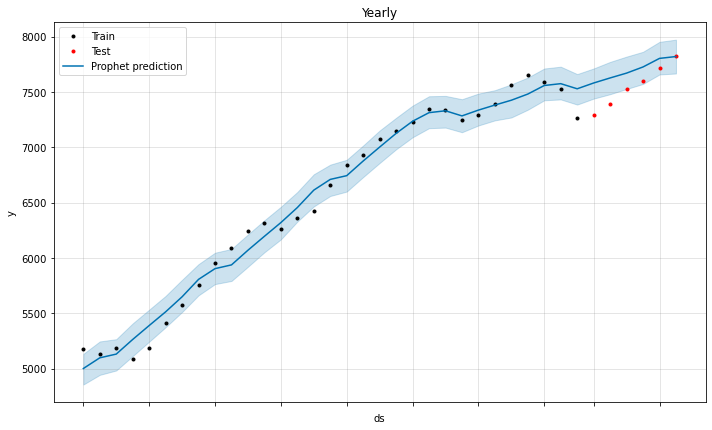

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


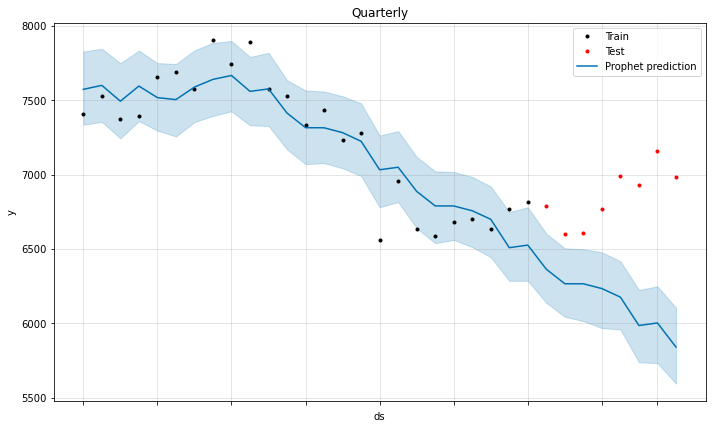

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


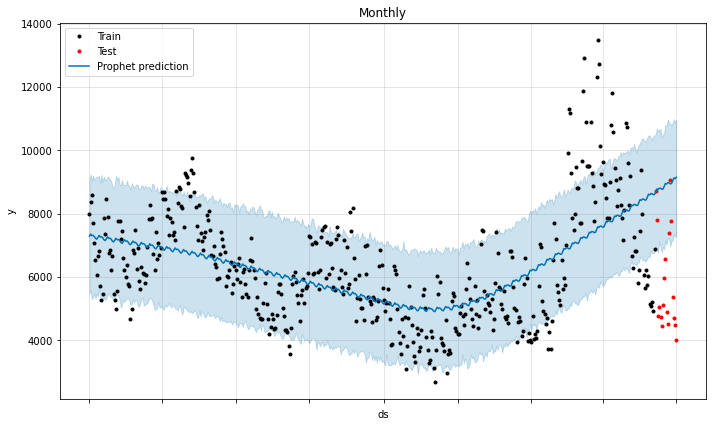

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


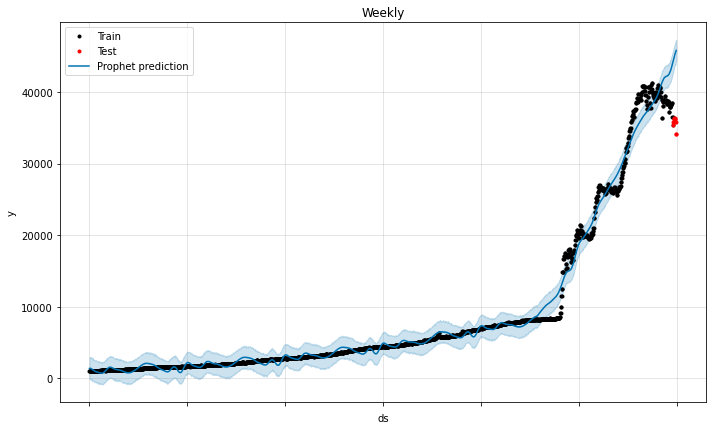

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


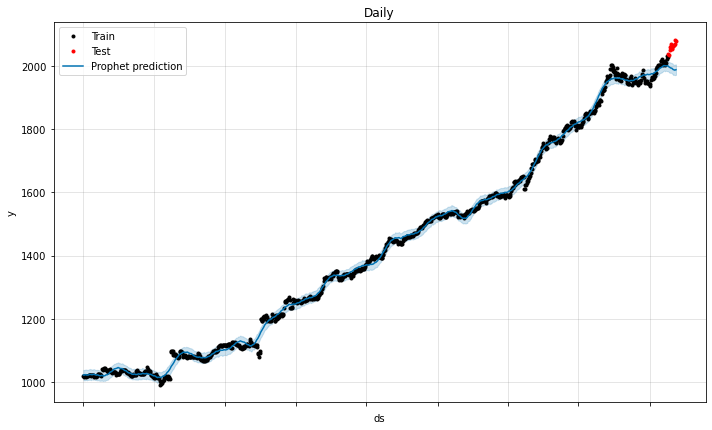

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


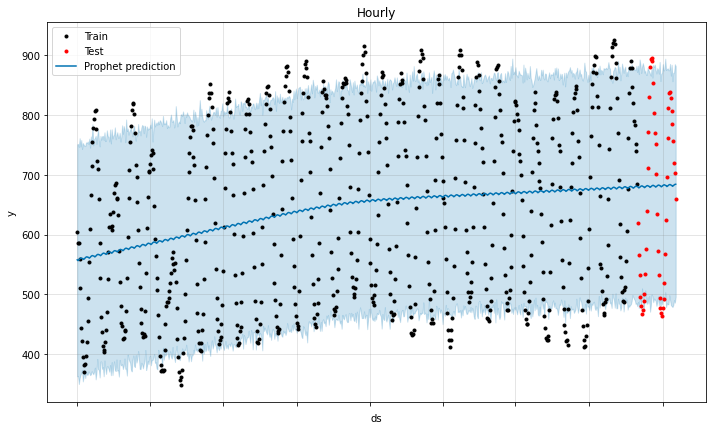

In [53]:
for df,freq,horizon,df_test in [(df_year,"Yearly",6,Y_test_sample),(df_quarter,"Quarterly",8,Q_test_sample),
                                (df_month,"Monthly",18,M_test_sample),(df_week,"Weekly",13,W_test_sample),
                                (df_day,"Daily",14,D_test_sample),(df_hour,"Hourly",48,H_test_sample)]:
    
    ts = pd.DataFrame({"ds":df["ds"],"y":df[freq[0]+str(1)]})
    ts = ts.dropna()
    ts_test = pd.DataFrame({"ds":(ts.iloc[-horizon:,0]+timedelta(horizon)).reset_index(drop=True),
                            "y":df_test.iloc[0,1:].reset_index(drop=True)}).set_index(pd.Index(ts.index[-horizon:]+horizon))
    model = Prophet()
    model.fit(ts)
    future = model.make_future_dataframe(periods=horizon)
    out = model.predict(future)
    
    plot(model,out,freq,ts_test)
    plt.savefig("./Prophet/plots/"+freq+"_Prophet.png",bbox_inches='tight')
    plt.show()

### NBeats

In [ ]:
#!pip install nbeats_forecast

In [17]:
from nbeats_forecast import NBeats

In [ ]:
#!pip install nbeats-keras

In [ ]:
#from nbeats_keras.model import NBeatsNet

#### Prediction

In [58]:
def nbeats_predict(train,horizon,freq,sample):
    df_pred = pd.DataFrame()
    end = train.shape[1]
    for k in tqdm.trange(1,end):
        ts = pd.DataFrame({"y":train[freq+str(k)]})
        ts["y"] = ts["y"].astype("float64")
        ts = ts.dropna()
        ts = np.array(ts)

        # define the model
        model = NBeats(data=ts,period_to_forecast=horizon)
        # fit the model
        model.fit(epoch=5)
        #predict
        out = model.predict()
        df_pred = df_pred.append(pd.DataFrame(out).transpose())
    
    df_pred.columns = ["V"+str(nb_ts) for nb_ts in range(2,horizon+2)]
    df_pred.index = sample.index
    df_pred["V1"] = [freq+str(nb_ts) for nb_ts in df_pred.index]
    df_pred = df_pred[["V"+str(nb_ts) for nb_ts in range(1,horizon+2)]]
    return df_pred

In [55]:
#Y_pred_nbeats = nbeats_predict(df_year, 6, "Y", Y_train_sample)
#Q_pred_nbeats = nbeats_predict(df_quarter, 8, "Q", Q_train_sample)
#M_pred_nbeats = nbeats_predict(df_month, 18, "M", M_train_sample)
#W_pred_nbeats = nbeats_predict(df_week, 13, "W", W_train_sample)
#D_pred_nbeats = nbeats_predict(df_day, 14, "D", D_train_sample)
#H_pred_nbeats = nbeats_predict(df_hour, 48, "H", H_train_sample)

In [44]:
#M_pred_nbeats = nbeats_predict(df_month, 18, "M", M_train_sample)
#M_pred_nbeats.to_csv("./NBeats/preds/M_pred_nbeats.csv",index=None)

In [54]:
#W_pred_nbeats = nbeats_predict(df_week, 13, "W", W_train_sample)
#W_pred_nbeats.to_csv("./NBeats/preds/W_pred_nbeats.csv",index=None)

In [59]:
#D_pred_nbeats = nbeats_predict(df_day, 14, "D", D_train_sample)
#D_pred_nbeats.to_csv("./NBeats/preds/D_pred_nbeats.csv",index=None)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\Manutea\Anaconda3\lib\site-packages\torch\nn\modules\container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419848
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419176
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039421528
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516800
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195491080
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489512
grad_step = 000030, tr_loss = 0.016708, te_loss = 0.853417
grad_step = 000060, tr_loss = 0.007875, te_loss = 0.853417
grad

  1%|▊                                                                                 | 1/100 [00:16<26:58, 16.35s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420240
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038951664
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741320
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860032
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351362904
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350019080
grad_step = 000030, tr_loss = 0.131224, te_loss = 1.260022
grad_step = 000060, tr_loss = 0.004770, te_loss = 1.260022
grad

  2%|█▋                                                                                | 2/100 [00:32<26:32, 16.25s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348286752
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516856
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419232
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420128
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914744
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914800
grad_step = 000030, tr_loss = 0.128132, te_loss = 1.339864
grad_step = 000060, tr_loss = 0.005436, te_loss = 1.339864
grad

  3%|██▍                                                                               | 3/100 [00:42<21:26, 13.26s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949872
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420632
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742384
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858688
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351362624
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351616800
grad_step = 000030, tr_loss = 0.035633, te_loss = 0.946616
grad_step = 000060, tr_loss = 0.008225, te_loss = 0.946616
grad

  4%|███▎                                                                              | 4/100 [00:52<19:05, 11.93s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348851096
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741320
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420128
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949200
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195488896
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490744
grad_step = 000030, tr_loss = 0.026328, te_loss = 0.770880
grad_step = 000060, tr_loss = 0.015437, te_loss = 0.770880
grad

  5%|████                                                                              | 5/100 [01:02<17:50, 11.27s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351783832
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039515232
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348745000
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418389748032
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594200
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350021656
grad_step = 000030, tr_loss = 0.022123, te_loss = 0.684583
grad_step = 000060, tr_loss = 0.007559, te_loss = 0.684583
grad

  6%|████▉                                                                             | 6/100 [01:18<20:28, 13.07s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351783776
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419120
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020480
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949200
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038913120
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038913344
grad_step = 000030, tr_loss = 0.025440, te_loss = 0.683772
grad_step = 000060, tr_loss = 0.014309, te_loss = 0.683772
grad

  7%|█████▋                                                                            | 7/100 [01:35<21:55, 14.15s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348851096
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348748192
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351657312
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348643104
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592576
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020704
grad_step = 000030, tr_loss = 0.033160, te_loss = 0.938221
grad_step = 000060, tr_loss = 0.003349, te_loss = 0.938221
grad

  8%|██████▌                                                                           | 8/100 [01:51<22:32, 14.70s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419008
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419344
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038950712
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038947912
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489288
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489960
grad_step = 000030, tr_loss = 0.019639, te_loss = 1.311039
grad_step = 000060, tr_loss = 0.002837, te_loss = 1.311039
grad

  9%|███████▍                                                                          | 9/100 [02:06<22:51, 15.08s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742776
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419624
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348643272
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351362624
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020424
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038912840
grad_step = 000030, tr_loss = 0.041474, te_loss = 1.150323
grad_step = 000060, tr_loss = 0.003502, te_loss = 1.150323
grad

 10%|████████                                                                         | 10/100 [02:20<22:08, 14.76s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418349861352
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419736
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949816
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351618592
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914296
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914576
grad_step = 000030, tr_loss = 0.033132, te_loss = 1.255721
grad_step = 000060, tr_loss = 0.007427, te_loss = 1.255721
grad

 11%|████████▉                                                                        | 11/100 [02:37<22:30, 15.17s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670776
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039513776
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858688
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595544
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350021656
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351723240
grad_step = 000030, tr_loss = 0.030777, te_loss = 0.845569
grad_step = 000060, tr_loss = 0.014167, te_loss = 0.845569
grad

 12%|█████████▋                                                                       | 12/100 [02:53<22:40, 15.46s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516464
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420632
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948024
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351723016
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195488840
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195491416
grad_step = 000030, tr_loss = 0.024701, te_loss = 0.753113
grad_step = 000060, tr_loss = 0.008840, te_loss = 0.753113
grad

 13%|██████████▌                                                                      | 13/100 [03:09<22:59, 15.86s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949536
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348289048
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860144
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593304
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350019080
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351723856
grad_step = 000030, tr_loss = 0.031353, te_loss = 0.703338
grad_step = 000060, tr_loss = 0.004684, te_loss = 0.703338
grad

 14%|███████████▎                                                                     | 14/100 [03:26<23:11, 16.18s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351781872
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419456
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948192
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351619936
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914408
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038911832
grad_step = 000030, tr_loss = 0.005372, te_loss = 0.419275
grad_step = 000060, tr_loss = 0.003008, te_loss = 0.419275
grad

 15%|████████████▏                                                                    | 15/100 [03:43<23:12, 16.38s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742776
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420240
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351362568
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350021824
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350018968
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351726320
grad_step = 000030, tr_loss = 0.021873, te_loss = 0.346203
grad_step = 000060, tr_loss = 0.005114, te_loss = 0.346203
grad

 16%|████████████▉                                                                    | 16/100 [03:59<22:51, 16.33s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743112
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419288
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038947912
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489288
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489960
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490800
grad_step = 000030, tr_loss = 0.055916, te_loss = 0.972668
grad_step = 000060, tr_loss = 0.006910, te_loss = 0.972668
grad

 17%|█████████████▊                                                                   | 17/100 [04:16<22:48, 16.49s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516464
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420240
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351362288
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020704
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351689344
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914072
grad_step = 000030, tr_loss = 0.016713, te_loss = 0.670491
grad_step = 000060, tr_loss = 0.008050, te_loss = 0.670491
grad

 18%|██████████████▌                                                                  | 18/100 [04:32<22:23, 16.38s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516632
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039418952
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948976
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351619040
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914800
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038913176
grad_step = 000030, tr_loss = 0.008004, te_loss = 0.608762
grad_step = 000060, tr_loss = 0.004066, te_loss = 0.608762
grad

 19%|███████████████▍                                                                 | 19/100 [04:49<22:02, 16.33s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860592
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420128
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595544
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020704
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351726320
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351566408
grad_step = 000030, tr_loss = 0.015439, te_loss = 0.599252
grad_step = 000060, tr_loss = 0.006517, te_loss = 0.599252
grad

 20%|████████████████▏                                                                | 20/100 [05:05<21:36, 16.21s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351362288
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419624
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948360
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348226040
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195491640
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489848
grad_step = 000030, tr_loss = 0.009591, te_loss = 0.666111
grad_step = 000060, tr_loss = 0.002533, te_loss = 0.666111
grad

 21%|█████████████████                                                                | 21/100 [05:21<21:30, 16.34s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948192
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419904
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594200
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020816
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351725536
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914072
grad_step = 000030, tr_loss = 0.010354, te_loss = 0.662679
grad_step = 000060, tr_loss = 0.005306, te_loss = 0.662679
grad

 22%|█████████████████▊                                                               | 22/100 [05:36<20:31, 15.78s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860592
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419232
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351617304
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351563328
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351565176
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038911720
grad_step = 000030, tr_loss = 0.052733, te_loss = 0.580070
grad_step = 000060, tr_loss = 0.011801, te_loss = 0.580070
grad

 23%|██████████████████▋                                                              | 23/100 [05:50<19:48, 15.44s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949816
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420408
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594200
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350018968
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351724472
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489512
grad_step = 000030, tr_loss = 0.019152, te_loss = 1.181012
grad_step = 000060, tr_loss = 0.007965, te_loss = 1.181012
grad

 24%|███████████████████▍                                                             | 24/100 [06:06<19:36, 15.48s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351783440
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419568
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351618592
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489288
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195491136
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195491248
grad_step = 000030, tr_loss = 0.194780, te_loss = 1.374717
grad_step = 000060, tr_loss = 0.023322, te_loss = 1.374717
grad

 25%|████████████████████▎                                                            | 25/100 [06:22<19:30, 15.60s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038950656
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039420408
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350022496
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350021768
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038913456
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914408
grad_step = 000030, tr_loss = 0.017435, te_loss = 0.503247
grad_step = 000060, tr_loss = 0.007582, te_loss = 0.503247
grad

 26%|█████████████████████                                                            | 26/100 [06:37<19:00, 15.41s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039513272
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039421808
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351619040
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490856
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489624
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490072
grad_step = 000030, tr_loss = 0.105674, te_loss = 1.209635
grad_step = 000060, tr_loss = 0.004774, te_loss = 1.209635
grad

 27%|█████████████████████▊                                                           | 27/100 [06:52<18:34, 15.27s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516464
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419400
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020704
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351724472
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038914072
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195491304
grad_step = 000030, tr_loss = 0.015519, te_loss = 0.398417
grad_step = 000060, tr_loss = 0.006107, te_loss = 0.398417
grad

 28%|██████████████████████▋                                                          | 28/100 [07:07<18:22, 15.31s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039513944
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351686208
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490240
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490016
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195490576
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348226096
grad_step = 000030, tr_loss = 0.011384, te_loss = 1.274663
grad_step = 000060, tr_loss = 0.005885, te_loss = 1.274663
grad

 29%|███████████████████████▍                                                         | 29/100 [07:24<18:33, 15.68s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039516576
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419456
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350020816
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351722848
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038913008
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489120
grad_step = 000030, tr_loss = 0.033341, te_loss = 0.763259
grad_step = 000060, tr_loss = 0.005625, te_loss = 0.763259
grad

 30%|████████████████████████▎                                                        | 30/100 [07:38<17:44, 15.21s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038949816
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039419232
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489960
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195489064
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418195488896
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348225368
grad_step = 000030, tr_loss = 0.013464, te_loss = 0.208364
grad_step = 000060, tr_loss = 0.003312, te_loss = 0.208364
grad

 31%|█████████████████████████                                                        | 31/100 [07:53<17:39, 15.35s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948752
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594704
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595152
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593136
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593584
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593248
grad_step = 000030, tr_loss = 0.055339, te_loss = 0.236646
grad_step = 000060, tr_loss = 0.007674, te_loss = 0.236646
grad

 32%|█████████████████████████▉                                                       | 32/100 [08:10<17:52, 15.77s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039513776
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038862400
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669656
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671056
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670832
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672736
grad_step = 000030, tr_loss = 0.027443, te_loss = 0.767906
grad_step = 000060, tr_loss = 0.002035, te_loss = 0.767906
grad

 33%|██████████████████████████▋                                                      | 33/100 [08:27<18:00, 16.12s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038948360
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122352
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124928
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122744
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122520
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125824
grad_step = 000030, tr_loss = 0.031345, te_loss = 0.768499
grad_step = 000060, tr_loss = 0.013379, te_loss = 0.768499
grad

 34%|███████████████████████████▌                                                     | 34/100 [08:44<18:08, 16.49s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418039515064
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348592320
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741432
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741992
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741880
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740144
grad_step = 000030, tr_loss = 0.036994, te_loss = 0.336660
grad_step = 000060, tr_loss = 0.012672, te_loss = 0.336660
grad

 35%|████████████████████████████▎                                                    | 35/100 [09:01<17:53, 16.52s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418040115096
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671952
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350596048
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592520
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594760
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595040
grad_step = 000030, tr_loss = 0.035616, te_loss = 0.949517
grad_step = 000060, tr_loss = 0.012410, te_loss = 0.949517
grad

 36%|█████████████████████████████▏                                                   | 36/100 [09:18<17:35, 16.49s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038947912
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124032
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670328
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670272
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672624
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670552
grad_step = 000030, tr_loss = 0.015942, te_loss = 0.677140
grad_step = 000060, tr_loss = 0.003279, te_loss = 0.677140
grad

 37%|█████████████████████████████▉                                                   | 37/100 [09:28<15:24, 14.67s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038862400
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348590976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124424
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124480
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122184
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122800
grad_step = 000030, tr_loss = 0.035627, te_loss = 0.633675
grad_step = 000060, tr_loss = 0.002759, te_loss = 0.633675
grad

 38%|██████████████████████████████▊                                                  | 38/100 [09:40<14:13, 13.77s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593808
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740536
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742440
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743168
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742944
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741096
grad_step = 000030, tr_loss = 0.025510, te_loss = 0.730888
grad_step = 000060, tr_loss = 0.003406, te_loss = 0.730888
grad

 39%|███████████████████████████████▌                                                 | 39/100 [09:51<13:23, 13.16s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038865256
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348590976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594200
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595040
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594760
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592520
grad_step = 000030, tr_loss = 0.018430, te_loss = 0.717554
grad_step = 000060, tr_loss = 0.001193, te_loss = 0.717554
grad

 40%|████████████████████████████████▍                                                | 40/100 [10:02<12:23, 12.40s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418038947912
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350739528
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741600
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741712
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350739808
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125936
grad_step = 000030, tr_loss = 0.012940, te_loss = 0.284948
grad_step = 000060, tr_loss = 0.004716, te_loss = 0.284948
grad

 41%|█████████████████████████████████▏                                               | 41/100 [10:14<12:01, 12.23s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348592992
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351673296
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669488
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595096
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592912
grad_step = 000030, tr_loss = 0.016747, te_loss = 0.466341
grad_step = 000060, tr_loss = 0.008962, te_loss = 0.466341
grad

 42%|██████████████████████████████████                                               | 42/100 [10:26<11:43, 12.14s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418040112408
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740592
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741096
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740480
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670048
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670104
grad_step = 000030, tr_loss = 0.040628, te_loss = 1.000079
grad_step = 000060, tr_loss = 0.002003, te_loss = 1.000079
grad

 43%|██████████████████████████████████▊                                              | 43/100 [10:37<11:18, 11.90s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742944
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348592768
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348126048
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125320
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124760
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123528
grad_step = 000030, tr_loss = 0.169084, te_loss = 1.266281
grad_step = 000060, tr_loss = 0.002207, te_loss = 1.266281
grad

 44%|███████████████████████████████████▋                                             | 44/100 [10:54<12:23, 13.27s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740312
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742608
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741936
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592464
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593976
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670496
grad_step = 000030, tr_loss = 0.042052, te_loss = 1.044559
grad_step = 000060, tr_loss = 0.001662, te_loss = 1.044559
grad

 45%|████████████████████████████████████▍                                            | 45/100 [11:05<11:41, 12.76s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348590528
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740928
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350596048
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595824
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593416
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594424
grad_step = 000030, tr_loss = 0.071093, te_loss = 1.389150
grad_step = 000060, tr_loss = 0.001714, te_loss = 1.389150
grad

 46%|█████████████████████████████████████▎                                           | 46/100 [11:15<10:39, 11.85s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348592544
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742048
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743392
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594592
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670272
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670104
grad_step = 000030, tr_loss = 0.057880, te_loss = 1.032750
grad_step = 000060, tr_loss = 0.001834, te_loss = 1.032750
grad

 47%|██████████████████████████████████████                                           | 47/100 [11:25<10:06, 11.44s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742216
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740032
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593024
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595376
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594480
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593696
grad_step = 000030, tr_loss = 0.030730, te_loss = 1.560720
grad_step = 000060, tr_loss = 0.014666, te_loss = 1.560720
grad

 48%|██████████████████████████████████████▉                                          | 48/100 [11:39<10:29, 12.10s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742608
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741152
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593808
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593752
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858632
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859696
grad_step = 000030, tr_loss = 0.036711, te_loss = 1.484510
grad_step = 000060, tr_loss = 0.012928, te_loss = 1.484510
grad

 49%|███████████████████████████████████████▋                                         | 49/100 [11:52<10:37, 12.51s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350739640
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741208
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594928
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595824
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593416
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595656
grad_step = 000030, tr_loss = 0.005127, te_loss = 0.784710
grad_step = 000060, tr_loss = 0.000192, te_loss = 0.784710
grad

 50%|████████████████████████████████████████▌                                        | 50/100 [12:08<11:13, 13.47s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741488
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743448
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593192
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592576
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125992
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122912
grad_step = 000030, tr_loss = 0.018551, te_loss = 0.847667
grad_step = 000060, tr_loss = 0.001176, te_loss = 0.847667
grad

 51%|█████████████████████████████████████████▎                                       | 51/100 [12:18<10:01, 12.27s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743112
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741992
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595040
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592128
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594424
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125880
grad_step = 000030, tr_loss = 0.104418, te_loss = 0.564455
grad_step = 000060, tr_loss = 0.006339, te_loss = 0.564455
grad

 52%|██████████████████████████████████████████                                       | 52/100 [12:29<09:29, 11.86s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743224
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594592
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670720
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670104
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671392
grad_step = 000030, tr_loss = 0.023254, te_loss = 1.608114
grad_step = 000060, tr_loss = 0.001413, te_loss = 1.608114
grad

 53%|██████████████████████████████████████████▉                                      | 53/100 [12:40<09:09, 11.70s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350739640
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595600
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594984
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593136
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594480
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861544
grad_step = 000030, tr_loss = 0.124318, te_loss = 1.329204
grad_step = 000060, tr_loss = 0.002941, te_loss = 1.329204
grad

 54%|███████████████████████████████████████████▋                                     | 54/100 [12:51<08:51, 11.56s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741936
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741880
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593752
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123976
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125656
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124200
grad_step = 000030, tr_loss = 0.031251, te_loss = 0.450989
grad_step = 000060, tr_loss = 0.008499, te_loss = 0.450989
grad

 55%|████████████████████████████████████████████▌                                    | 55/100 [13:07<09:38, 12.85s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740368
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592744
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593416
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592912
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125208
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123360
grad_step = 000030, tr_loss = 0.019172, te_loss = 1.206828
grad_step = 000060, tr_loss = 0.008644, te_loss = 1.206828
grad

 56%|█████████████████████████████████████████████▎                                   | 56/100 [13:22<09:59, 13.62s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743168
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592576
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593584
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859248
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860256
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860312
grad_step = 000030, tr_loss = 0.147402, te_loss = 1.160646
grad_step = 000060, tr_loss = 0.001918, te_loss = 1.160646
grad

 57%|██████████████████████████████████████████████▏                                  | 57/100 [13:33<09:06, 12.71s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740256
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595264
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595936
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351673296
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670944
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125208
grad_step = 000030, tr_loss = 0.014078, te_loss = 1.032768
grad_step = 000060, tr_loss = 0.001332, te_loss = 1.032768
grad

 58%|██████████████████████████████████████████████▉                                  | 58/100 [13:43<08:19, 11.90s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595768
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743168
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670328
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351673184
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669880
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672008
grad_step = 000030, tr_loss = 0.130056, te_loss = 0.981063
grad_step = 000060, tr_loss = 0.002264, te_loss = 0.981063
grad

 59%|███████████████████████████████████████████████▊                                 | 59/100 [13:52<07:36, 11.13s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592184
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594536
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860368
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351857736
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858016
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124256
grad_step = 000030, tr_loss = 0.024824, te_loss = 0.920930
grad_step = 000060, tr_loss = 0.014317, te_loss = 0.920930
grad

 60%|████████████████████████████████████████████████▌                                | 60/100 [14:04<07:35, 11.38s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741712
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858072
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860760
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860536
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858464
grad_step = 000030, tr_loss = 0.014282, te_loss = 0.554416
grad_step = 000060, tr_loss = 0.004969, te_loss = 0.554416
grad

 61%|█████████████████████████████████████████████████▍                               | 61/100 [14:13<06:58, 10.72s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741768
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593024
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858296
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861432
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861208
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125712
grad_step = 000030, tr_loss = 0.033576, te_loss = 1.378534
grad_step = 000060, tr_loss = 0.000929, te_loss = 1.378534
grad

 62%|██████████████████████████████████████████████████▏                              | 62/100 [14:23<06:30, 10.26s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350741824
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592464
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860424
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860256
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859248
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671280
grad_step = 000030, tr_loss = 0.029222, te_loss = 1.066825
grad_step = 000060, tr_loss = 0.001498, te_loss = 1.066825
grad

 63%|███████████████████████████████████████████████████                              | 63/100 [14:32<06:07,  9.92s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595768
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860872
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860816
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122520
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123752
grad_step = 000030, tr_loss = 0.036904, te_loss = 0.807583
grad_step = 000060, tr_loss = 0.010485, te_loss = 0.807583
grad

 64%|███████████████████████████████████████████████████▊                             | 64/100 [14:47<06:54, 11.52s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592240
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350742496
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860760
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858800
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859416
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672512
grad_step = 000030, tr_loss = 0.014411, te_loss = 0.314142
grad_step = 000060, tr_loss = 0.009841, te_loss = 0.314142
grad

 65%|████████████████████████████████████████████████████▋                            | 65/100 [14:56<06:21, 10.91s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595936
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593360
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859360
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858744
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848744
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849584
grad_step = 000030, tr_loss = 0.118859, te_loss = 0.719640
grad_step = 000060, tr_loss = 0.009277, te_loss = 0.719640
grad

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [15:12<06:55, 12.22s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350740872
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861096
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860256
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861600
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125936
grad_step = 000030, tr_loss = 0.028742, te_loss = 1.508942
grad_step = 000060, tr_loss = 0.001352, te_loss = 1.508942
grad

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [15:21<06:11, 11.27s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350743000
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351857848
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351857736
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858912
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671224
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351673072
grad_step = 000030, tr_loss = 0.060169, te_loss = 1.136465
grad_step = 000060, tr_loss = 0.003560, te_loss = 1.136465
grad

 68%|███████████████████████████████████████████████████████                          | 68/100 [15:30<05:41, 10.66s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859696
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858296
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858800
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847288
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848520
grad_step = 000030, tr_loss = 0.039295, te_loss = 1.397207
grad_step = 000060, tr_loss = 0.002042, te_loss = 1.397207
grad

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [15:39<05:17, 10.24s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350739640
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858912
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595656
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125096
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123752
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125824
grad_step = 000030, tr_loss = 0.012214, te_loss = 0.399762
grad_step = 000060, tr_loss = 0.000302, te_loss = 0.399762
grad

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [15:55<05:51, 11.73s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860424
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860928
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860256
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671280
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670440
grad_step = 000030, tr_loss = 0.031387, te_loss = 1.328672
grad_step = 000060, tr_loss = 0.001624, te_loss = 1.328672
grad

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [16:04<05:20, 11.04s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350739808
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859472
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592520
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850144
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849584
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850312
grad_step = 000030, tr_loss = 0.077297, te_loss = 1.267149
grad_step = 000060, tr_loss = 0.002435, te_loss = 1.267149
grad

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [16:14<05:03, 10.84s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858464
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860872
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858856
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861600
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125040
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124704
grad_step = 000030, tr_loss = 0.018390, te_loss = 0.954894
grad_step = 000060, tr_loss = 0.001516, te_loss = 0.954894
grad

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [16:24<04:40, 10.40s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351857904
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350594816
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671896
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671000
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672288
grad_step = 000030, tr_loss = 0.029107, te_loss = 1.334825
grad_step = 000060, tr_loss = 0.001758, te_loss = 1.334825
grad

 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [16:32<04:12,  9.72s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350593024
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859416
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861376
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670552
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671672
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670664
grad_step = 000030, tr_loss = 0.041383, te_loss = 1.306533
grad_step = 000060, tr_loss = 0.002055, te_loss = 1.306533
grad

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [16:41<04:00,  9.61s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859472
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861264
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595152
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122520
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348126104
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124144
grad_step = 000030, tr_loss = 0.039919, te_loss = 1.199229
grad_step = 000060, tr_loss = 0.001717, te_loss = 1.199229
grad

 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [16:49<03:41,  9.21s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350595768
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859136
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858800
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850816
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848464
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848800
grad_step = 000030, tr_loss = 0.067979, te_loss = 1.302633
grad_step = 000060, tr_loss = 0.002336, te_loss = 1.302633
grad

 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [16:59<03:36,  9.40s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859304
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861432
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850704
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848128
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850928
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847848
grad_step = 000030, tr_loss = 0.029213, te_loss = 0.847596
grad_step = 000060, tr_loss = 0.003285, te_loss = 0.847596
grad

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [17:10<03:34,  9.76s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858072
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849192
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850200
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848240
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849696
grad_step = 000030, tr_loss = 0.046444, te_loss = 0.720737
grad_step = 000060, tr_loss = 0.001088, te_loss = 0.720737
grad

 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [17:19<03:21,  9.62s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350592128
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859416
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848744
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849472
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348851152
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850032
grad_step = 000030, tr_loss = 0.136859, te_loss = 1.390543
grad_step = 000060, tr_loss = 0.010611, te_loss = 1.390543
grad

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [17:27<03:03,  9.18s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861600
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859360
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847400
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848632
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847288
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670272
grad_step = 000030, tr_loss = 0.051195, te_loss = 1.724245
grad_step = 000060, tr_loss = 0.001766, te_loss = 1.724245
grad

 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [17:38<03:01,  9.53s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858744
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859416
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847904
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848128
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850928
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124928
grad_step = 000030, tr_loss = 0.036301, te_loss = 1.245659
grad_step = 000060, tr_loss = 0.002044, te_loss = 1.245659
grad

 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [17:49<02:58,  9.93s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858128
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858072
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849248
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848240
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850984
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348698424
grad_step = 000030, tr_loss = 0.047652, te_loss = 0.956618
grad_step = 000060, tr_loss = 0.003232, te_loss = 0.956618
grad

 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [17:58<02:43,  9.64s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860312
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860536
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847680
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849472
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847960
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670104
grad_step = 000030, tr_loss = 0.020527, te_loss = 0.899834
grad_step = 000060, tr_loss = 0.001718, te_loss = 0.899834
grad

 84%|████████████████████████████████████████████████████████████████████             | 84/100 [18:08<02:36,  9.78s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351857960
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859472
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850144
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849808
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847792
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122856
grad_step = 000030, tr_loss = 0.059058, te_loss = 0.737821
grad_step = 000060, tr_loss = 0.012346, te_loss = 0.737821
grad

 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [18:19<02:34, 10.29s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351859976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860928
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848016
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847344
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848688
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348695736
grad_step = 000030, tr_loss = 0.001868, te_loss = 0.515453
grad_step = 000060, tr_loss = 0.000147, te_loss = 0.515453
grad

 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [18:32<02:34, 11.03s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351857736
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849024
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847288
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848800
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671280
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671168
grad_step = 000030, tr_loss = 0.011663, te_loss = 0.658407
grad_step = 000060, tr_loss = 0.005088, te_loss = 0.658407
grad

 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [18:44<02:28, 11.40s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861320
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847848
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849584
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348849360
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122968
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125432
grad_step = 000030, tr_loss = 0.022349, te_loss = 0.869939
grad_step = 000060, tr_loss = 0.005347, te_loss = 0.869939
grad

 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [18:56<02:19, 11.65s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858184
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123360
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350482040
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350481760
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350484728
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350482880
grad_step = 000030, tr_loss = 0.018776, te_loss = 0.824206
grad_step = 000060, tr_loss = 0.005104, te_loss = 0.824206
grad

 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [19:09<02:09, 11.80s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351861656
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850928
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670216
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671952
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669824
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672288
grad_step = 000030, tr_loss = 0.010714, te_loss = 0.577996
grad_step = 000060, tr_loss = 0.004379, te_loss = 0.577996
grad

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [19:21<02:00, 12.06s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848968
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858744
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351780192
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351783496
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351781312
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351780808
grad_step = 000030, tr_loss = 0.023447, te_loss = 1.090160
grad_step = 000060, tr_loss = 0.005632, te_loss = 1.090160
grad

 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [19:33<01:48, 12.06s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850592
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350484616
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348125264
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348126104
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348126160
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348124928
grad_step = 000030, tr_loss = 0.046412, te_loss = 1.214747
grad_step = 000060, tr_loss = 0.005403, te_loss = 1.214747
grad

 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [19:46<01:36, 12.12s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351860312
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848912
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350483160
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350485456
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350484000
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350484952
grad_step = 000030, tr_loss = 0.017701, te_loss = 0.786400
grad_step = 000060, tr_loss = 0.004353, te_loss = 0.786400
grad

 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [19:58<01:25, 12.15s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351858632
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671224
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670048
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672792
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669880
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669376
grad_step = 000030, tr_loss = 0.018236, te_loss = 0.981600
grad_step = 000060, tr_loss = 0.004457, te_loss = 0.981600
grad

 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [20:10<01:12, 12.11s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850536
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348123640
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351780752
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351781144
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351782488
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351780528
grad_step = 000030, tr_loss = 0.009408, te_loss = 0.583996
grad_step = 000060, tr_loss = 0.003776, te_loss = 0.583996
grad

 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [20:22<01:00, 12.16s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850088
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672288
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351672400
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670216
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670272
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350483720
grad_step = 000030, tr_loss = 0.023131, te_loss = 0.836210
grad_step = 000060, tr_loss = 0.004644, te_loss = 0.836210
grad

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [20:34<00:48, 12.20s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671000
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850928
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350481928
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350484728
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350482880
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350485232
grad_step = 000030, tr_loss = 0.013434, te_loss = 1.234909
grad_step = 000060, tr_loss = 0.003902, te_loss = 1.234909
grad

 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [20:46<00:36, 12.14s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348848688
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351669544
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351673240
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670104
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351780416
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348697192
grad_step = 000030, tr_loss = 0.131004, te_loss = 1.007385
grad_step = 000060, tr_loss = 0.006434, te_loss = 1.007385
grad

 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [20:57<00:23, 11.85s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348850760
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351671560
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351783608
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351782264
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351780696
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351779912
grad_step = 000030, tr_loss = 0.019948, te_loss = 0.662595
grad_step = 000060, tr_loss = 0.004318, te_loss = 0.662595
grad

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [21:13<00:12, 12.96s/it]

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348847232
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670440
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=42, forecast_length=14, share_thetas=False) at @1418351670888
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350481592
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418350482544
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=42, forecast_length=14, share_thetas=False) at @1418348122576
grad_step = 000030, tr_loss = 0.040389, te_loss = 0.378608
grad_step = 000060, tr_loss = 0.010109, te_loss = 0.378608
grad

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [21:28<00:00, 12.89s/it]


In [ ]:
H_pred_nbeats = nbeats_predict(df_hour, 48, "H", H_train_sample)

#### Reimport data for future usage

In [65]:
M_pred_nbeats = pd.read_csv("./NBeats/preds/M_pred_nbeats.csv")
W_pred_nbeats = pd.read_csv("./NBeats/preds/W_pred_nbeats.csv")
D_pred_nbeats = pd.read_csv("./NBeats/preds/D_pred_nbeats.csv")
H_pred_nbeats = pd.read_csv("./NBeats/preds/H_pred_nbeats.csv")

#### Errors

In [66]:
def get_error2(preds):
    """Compute and return the MASE and sMAPE for every frequency of the data as a DataFrame
    
    Parameters
    ----------
    preds : list of all the 6 Dataframe predictions 
        ex: [Y_pred,Q_pred,M_pred,W_pred,D_pred,H_pred]
    """
    err = pd.DataFrame()
    M_pred,W_pred,D_pred,H_pred = preds
    l = tqdm.tqdm([(M_train_sample,M_test_sample,M_pred,"Monthly"),
     (W_train_sample,W_test_sample,W_pred,"Weekly"),
     (D_train_sample,D_test_sample,D_pred,"Daily"),
     (H_train_sample,H_test_sample,H_pred,"Hourly")])

    for train,test,pred,freq in l:
        err = err.append(pd.DataFrame({"sMAPE":sMAPE(train,test,pred),
                                        "MASE":MASE(train,test,pred,str(freq[0]))},index = pd.Index([freq])))
    return err

In [67]:
preds = [M_pred_nbeats,W_pred_nbeats,D_pred_nbeats,H_pred_nbeats]

err_nbeats = get_error2(preds)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.09s/it]


In [68]:
err_nbeats

,sMAPE,MASE
Monthly,18.141179,2.412750
Weekly,22.128541,16.200122
Daily,14.510536,25.283014
Hourly,17.035861,2.760695


In [69]:
err_nbeats.mean()

sMAPE    17.954029
MASE     11.664145
dtype: float64

In [70]:
OWA(err_nbeats)

3.6437844845951872

#### Some plots

In [73]:
M_pred_nbeats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,M0,7124.7573,8035.6973,6184.1387,5302.2410,4763.6304,4651.6340,4964.7250,4661.5654,3855.1538,3761.3940,4417.2437,6359.5903,7428.8154,8212.6180,7119.0454,5758.9560,5400.5620,4519.4136
1,M1,2602.0122,2020.4403,2317.9316,1913.1120,2529.6560,2142.4336,2489.1145,2304.2173,1844.6113,1397.5270,1777.9540,1485.4850,1958.7504,1920.7931,2110.6480,2290.6501,2196.8610,2564.7795
2,M2,12193.2230,13937.0830,12572.5450,11405.5810,11747.5440,13862.0340,13695.8220,11733.0990,12442.9700,14358.8970,13579.9710,12639.3820,12996.8950,13570.4240,12432.5540,13113.5730,14254.5360,13082.3830
3,M3,6561.3730,6657.9760,6705.2236,6761.9070,6928.1560,6644.8745,6591.9424,6635.3022,6612.2876,6757.1340,6578.5566,6609.9410,6322.6040,6568.6270,6714.7456,6507.1274,6347.8720,6651.4175
4,M4,4460.5520,4454.6370,4457.8880,4451.5620,4416.4316,4456.4340,4461.1216,4441.2285,4474.8400,4441.6320,4532.7925,4463.5840,4389.5280,4457.1720,4440.8220,4549.1020,4462.7407,4505.9860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M95,1331.1976,1355.8501,1342.4227,1372.9432,1372.5314,1381.1973,1377.9368,1371.4161,1363.8096,1387.8821,1430.0602,1405.3922,1430.9551,1464.8385,1458.4847,1463.3839,1467.6954,1463.0837
96,M96,2370.8657,2677.9920,2680.3000,2981.2292,2834.0212,2195.4573,2683.3394,1722.8838,1800.0493,1380.4186,1420.7556,1440.0251,1506.0917,1784.8975,2092.2478,1901.8690,1727.4052,1730.2048
97,M97,2489.5933,2511.8170,2507.1313,2438.4927,2524.7983,2509.4614,2435.8806,2433.4530,2304.6814,2368.7556,2254.2756,2236.9995,2242.2580,2235.8790,2218.0640,2116.4521,2182.7747,2073.4045
98,M98,3862.8394,4633.9640,3934.8118,4133.5390,4448.6665,3705.8525,4143.2000,3297.5054,3383.4136,2954.5515,3804.5142,4188.3154,4321.1772,4368.8047,3997.8914,3830.9053,4064.4420,4569.5510


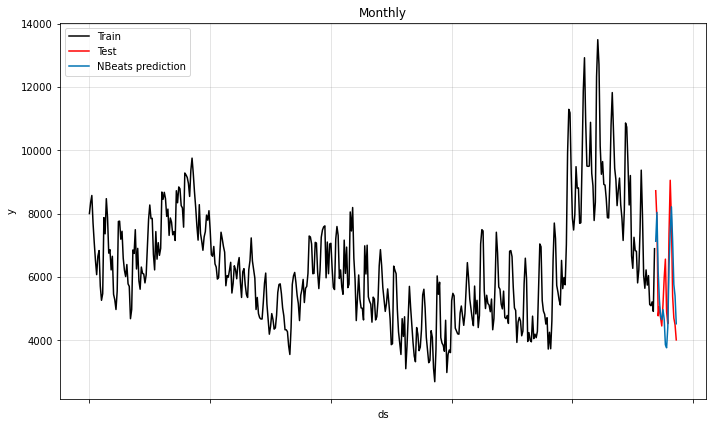

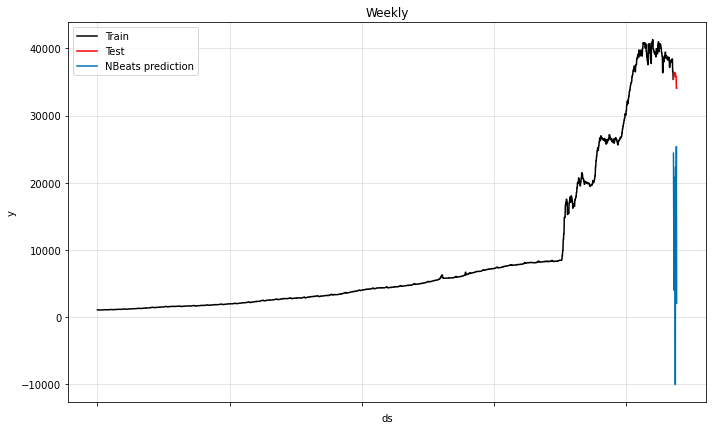

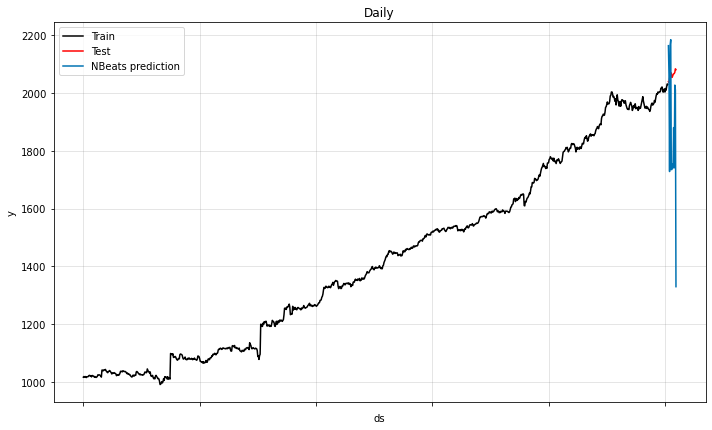

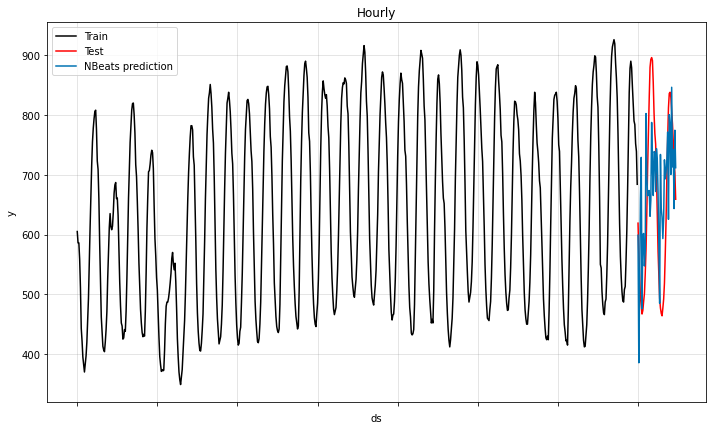

In [75]:
for df_pred,df_train,df_test,freq,horizon in [(M_pred_nbeats,M_train_sample,M_test_sample,"Monthly",18),
          (W_pred_nbeats,W_train_sample,W_test_sample,"Weekly",13),
          (D_pred_nbeats,D_train_sample,D_test_sample,"Daily",14),
          (H_pred_nbeats,H_train_sample,H_test_sample,"Hourly",48)]:
    
    ts_train = df_train.iloc[0,1:].dropna().reset_index(drop=True)
    ts_test = df_test.iloc[0,1:]
    ts_pred = df_pred.iloc[0,1:]
    n = ts_train.shape[0]
    ts_test.index = range(n,n+horizon)
    ts_pred.index = range(n,n+horizon)
    
    fig = plt.figure(facecolor='w', figsize=(10,6))
    ax = fig.add_subplot(111)

    ax.plot(ts_train,ls='-', c='k',label = 'Train')
    ax.plot(ts_test,ls='-',c="red",label = 'Test')
    ax.plot(ts_pred, ls='-', c='#0072B2',label = 'NBeats prediction')
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel('ds')
    ax.set_ylabel('y')
    fig.tight_layout()
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    plt.legend(loc="best")
    plt.title(freq)
    plt.savefig("./NBeats/plots/"+freq+"_NBeats.png",bbox_inches='tight')

### ES-RNN

In [60]:
from ESRNN.m4_data import prepare_m4_data
from ESRNN.utils_evaluation import evaluate_prediction_owa

from ESRNN import ESRNN

#### Prediction

In [61]:
from ESRNN.m4_data import prepare_m4_data
from ESRNN.utils_evaluation import evaluate_prediction_owa

from ESRNN import ESRNN

def esrnn_model(dataset_frequency, num_of_obs, horizon, epochs):

    X_train_df, y_train_df, X_test_df, y_test_df = prepare_m4_data(dataset_name=dataset_frequency,
                                                                   directory = './data',
                                                                   num_obs = num_of_obs)

    # Instantiate model
    model = ESRNN(max_epochs=epochs, freq_of_test=5, batch_size=4, learning_rate=1e-4,
                  per_series_lr_multip=0.8, lr_scheduler_step_size=10,
                  lr_decay=0.1, gradient_clipping_threshold=50,
                  rnn_weight_decay=0.0, level_variability_penalty=100,
                  testing_percentile=50, training_percentile=50,
                  ensemble=False, max_periods=25, seasonality=[],
                  input_size=4, output_size=horizon,
                  cell_type='LSTM', state_hsize=40,
                  dilations=[[1], [6]], add_nl_layer=False,
                  random_seed=1, device='cpu')

    # Fit model
    # If y_test_df is provided the model
    # will evaluate predictions on
    # this set every freq_test epochs
    model.fit(X_train_df, y_train_df, X_test_df, y_test_df)

    # Predict on test set
    y_hat_df = model.predict(X_test_df)

    # Evaluate predictions
    final_owa, final_mase, final_smape = evaluate_prediction_owa(y_hat_df, y_train_df,
                                                                 X_test_df, y_test_df,
                                                                 naive2_seasonality=1)
    return(y_hat_df)

In [ ]:
Y_pred_esrnn = esrnn_model("Yearly", 100, 6, 50)
Q_pred_esrnn = esrnn_model("Quarterly", 100, 8, 50)
M_pred_esrnn = esrnn_model("Monthly", 100, 18, 50)
W_pred_esrnn = esrnn_model("Weekly", 100, 13, 50)
D_pred_esrnn = esrnn_model("Daily", 100, 14, 50)
H_pred_esrnn = esrnn_model("Hourly", 100, 48, 50)

In [ ]:
Y_pred_esrnn.to_csv("./ESRNN/preds/Yearly_ESRNN.csv",index=None)
Q_pred_esrnn.to_csv("./ESRNN/preds/Quarterly_ESRNN.csv",index=None)
M_pred_esrnn.to_csv("./ESRNN/preds/Monthly_ESRNN.csv",index=None)
W_pred_esrnn.to_csv("./ESRNN/preds/Weekly_ESRNN.csv",index=None)
D_pred_esrnn.to_csv("./ESRNN/preds/Daily_ESRNN.csv",index=None)
H_pred_esrnn.to_csv("./ESRNN/preds/Hourly_ESRNN.csv",index=None)

#### Reimport data for future usage

In [62]:
Y_pred_esrnn = pd.read_csv("./ESRNN/preds/Yearly_ESRNN.csv")
Q_pred_esrnn = pd.read_csv("./ESRNN/preds/Quarterly_ESRNN.csv")
M_pred_esrnn = pd.read_csv("./ESRNN/preds/Monthly_ESRNN.csv")
W_pred_esrnn = pd.read_csv("./ESRNN/preds/Weekly_ESRNN.csv")
D_pred_esrnn = pd.read_csv("./ESRNN/preds/Daily_ESRNN.csv")
H_pred_esrnn = pd.read_csv("./ESRNN/preds/Hourly_ESRNN.csv")

#### Some plots

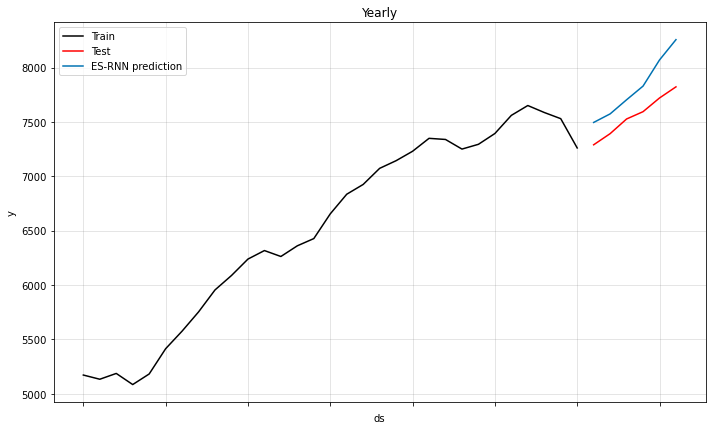

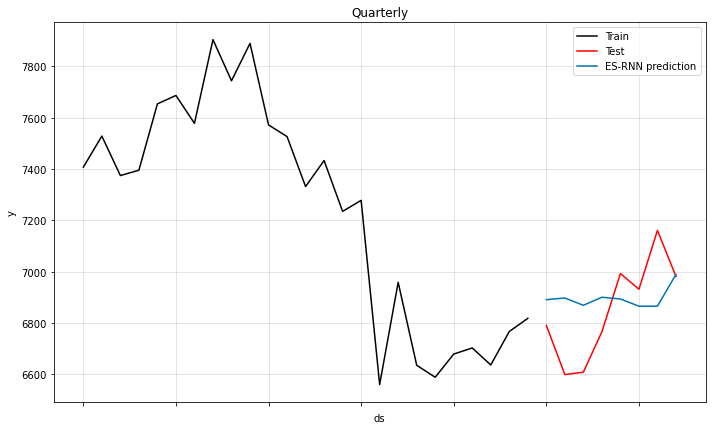

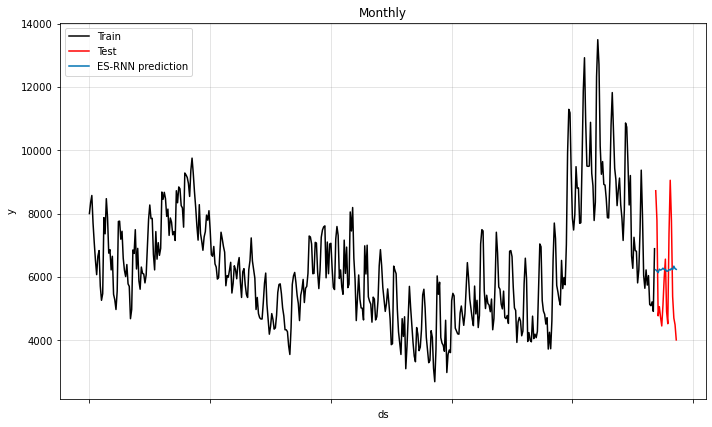

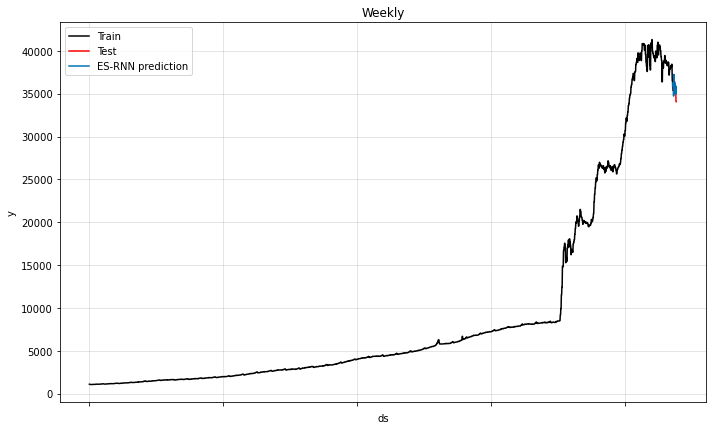

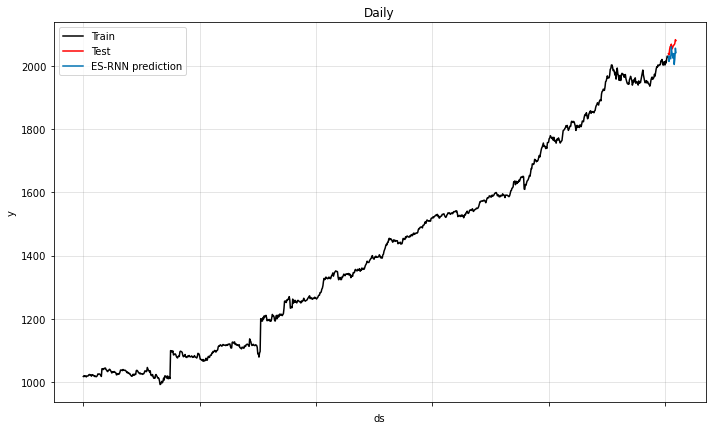

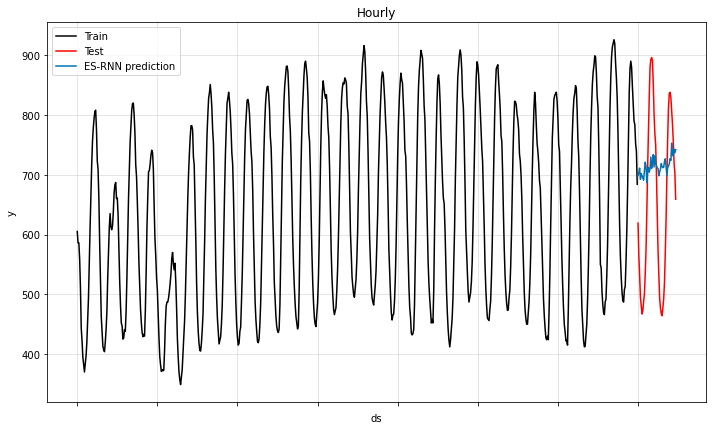

In [64]:
for df_pred,df_train,df_test,freq,horizon in [(Y_pred_esrnn,Y_train_sample,Y_test_sample,"Yearly",6),
          (Q_pred_esrnn,Q_train_sample,Q_test_sample,"Quarterly",8),
          (M_pred_esrnn,M_train_sample,M_test_sample,"Monthly",18),
          (W_pred_esrnn,W_train_sample,W_test_sample,"Weekly",13),
          (D_pred_esrnn,D_train_sample,D_test_sample,"Daily",14),
          (H_pred_esrnn,H_train_sample,H_test_sample,"Hourly",48)]:
    
    ts_train = df_train.iloc[0,1:].dropna().reset_index(drop=True)
    ts_test = df_test.iloc[0,1:]
    ts_pred = df_pred[df_pred.unique_id == freq[0]+"1"]["y_hat"]
    n = ts_train.shape[0]
    ts_test.index = range(n,n+horizon)
    ts_pred.index = range(n,n+horizon)
    
    fig = plt.figure(facecolor='w', figsize=(10,6))
    ax = fig.add_subplot(111)

    ax.plot(ts_train,ls='-', c='k',label = 'Train')
    ax.plot(ts_test,ls='-',c="red",label = 'Test')
    ax.plot(ts_pred, ls='-', c='#0072B2',label = 'ES-RNN prediction')
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel('ds')
    ax.set_ylabel('y')
    fig.tight_layout()
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    plt.legend(loc="best")
    plt.title(freq)
    plt.savefig("./ESRNN/plots/"+freq+"_ESRNN.png",bbox_inches='tight')